In [47]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Load the dataset from the npz file
dataset_train = np.load(r'C:\Users\Lenovo\Downloads\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_train.npz')
dataset_test = np.load(r'C:\Users\Lenovo\Downloads\Kannada_MNIST_npz\Kannada_MNIST\X_kannada_MNIST_test.npz')

X_train = dataset_train['arr_0']
X_test = dataset_test['arr_0']

# Flatten each image to a 1D array of length 784 (28 * 28)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Load the corresponding labels
y_train = np.load(r'C:\Users\Lenovo\Downloads\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_train.npz')['arr_0']
y_test = np.load(r'C:\Users\Lenovo\Downloads\Kannada_MNIST_npz\Kannada_MNIST\y_kannada_MNIST_test.npz')['arr_0']

# Continue with the rest of the code as provided earlier...
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_flattened)
X_test_pca = pca.transform(X_test_flattened)

classifiers = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    y_prob = classifier.predict_proba(X_test_pca)
    
    # Compute macro-average ROC-AUC for multiclass classification
    roc_auc = roc_auc_score(y_test, y_prob, average='macro', multi_class='ovo')

    results[name] = {
        "Classification Report": classification_report(y_test, y_pred),
        "ROC-AUC": roc_auc
    }

    print(name)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc)
    print()


Decision Trees
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1000
           1       0.76      0.81      0.79      1000
           2       0.94      0.93      0.93      1000
           3       0.75      0.77      0.76      1000
           4       0.77      0.85      0.81      1000
           5       0.82      0.79      0.80      1000
           6       0.78      0.78      0.78      1000
           7       0.78      0.69      0.73      1000
           8       0.82      0.88      0.85      1000
           9       0.84      0.83      0.83      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

ROC-AUC: 0.8921666666666667

Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1000
           1       0.81     

PCA Component Size: 15
Decision Trees
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1000
           1       0.77      0.80      0.79      1000
           2       0.92      0.94      0.93      1000
           3       0.77      0.79      0.78      1000
           4       0.79      0.83      0.81      1000
           5       0.81      0.82      0.82      1000
           6       0.80      0.78      0.79      1000
           7       0.78      0.67      0.72      1000
           8       0.81      0.89      0.85      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

ROC-AUC (Macro): 0.8930555555555557



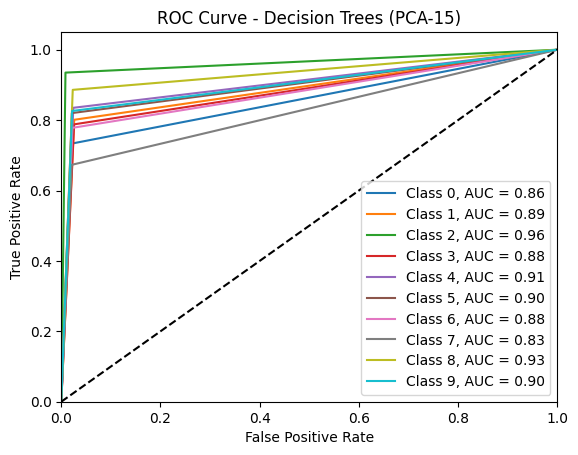

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1000
           1       0.82      0.92      0.87      1000
           2       0.99      0.98      0.99      1000
           3       0.86      0.91      0.88      1000
           4       0.83      0.94      0.88      1000
           5       0.92      0.86      0.89      1000
           6       0.86      0.87      0.87      1000
           7       0.92      0.76      0.83      1000
           8       0.89      0.96      0.93      1000
           9       0.91      0.90      0.91      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

ROC-AUC (Macro): 0.9920922666666667



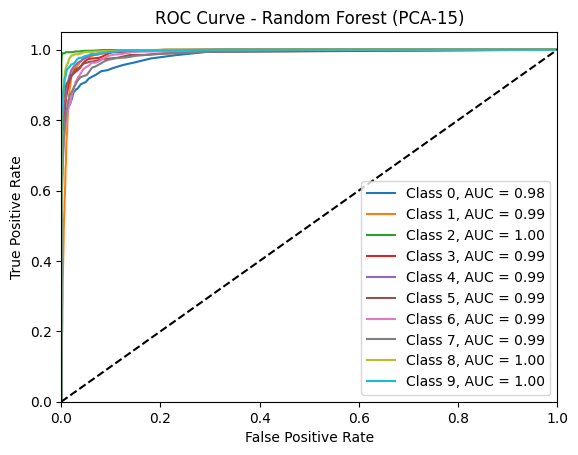

Naive Bayes
              precision    recall  f1-score   support

           0       0.75      0.60      0.67      1000
           1       0.72      0.78      0.75      1000
           2       0.89      0.98      0.93      1000
           3       0.74      0.80      0.77      1000
           4       0.72      0.88      0.79      1000
           5       0.87      0.74      0.80      1000
           6       0.76      0.79      0.77      1000
           7       0.77      0.68      0.72      1000
           8       0.75      0.82      0.78      1000
           9       0.91      0.81      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000

ROC-AUC (Macro): 0.9748074555555556



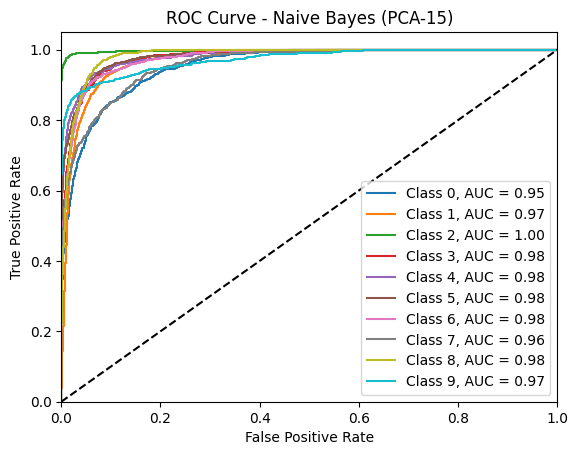

K-NN
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1000
           1       0.83      0.97      0.89      1000
           2       1.00      0.99      0.99      1000
           3       0.91      0.91      0.91      1000
           4       0.82      0.97      0.89      1000
           5       0.94      0.89      0.91      1000
           6       0.88      0.89      0.88      1000
           7       0.93      0.77      0.84      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC-AUC (Macro): 0.9782063055555554



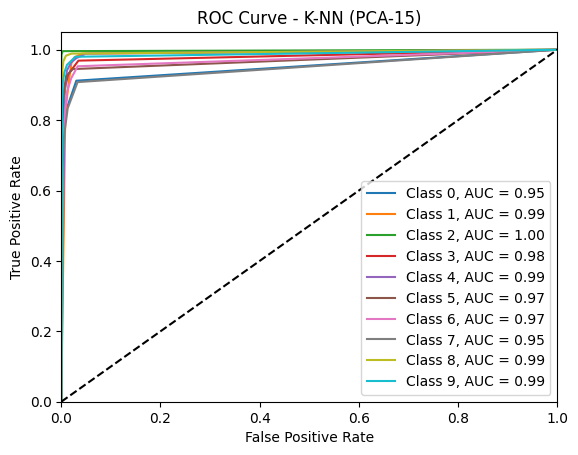

SVM
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1000
           1       0.86      0.95      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.96      0.90      1000
           5       0.93      0.89      0.91      1000
           6       0.90      0.91      0.90      1000
           7       0.94      0.80      0.87      1000
           8       0.93      0.98      0.95      1000
           9       0.92      0.93      0.93      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

ROC-AUC (Macro): 0.9954032444444445



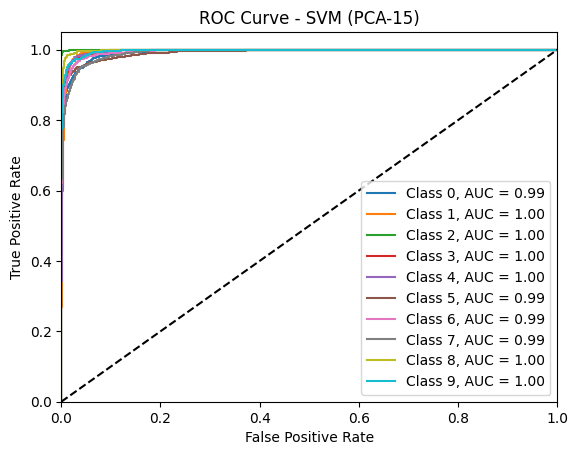

PCA Component Size: 20
Decision Trees
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.77      0.81      0.79      1000
           2       0.93      0.93      0.93      1000
           3       0.76      0.77      0.76      1000
           4       0.78      0.83      0.80      1000
           5       0.84      0.79      0.82      1000
           6       0.78      0.79      0.79      1000
           7       0.76      0.66      0.71      1000
           8       0.83      0.88      0.85      1000
           9       0.80      0.84      0.82      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

ROC-AUC (Macro): 0.8911111111111112



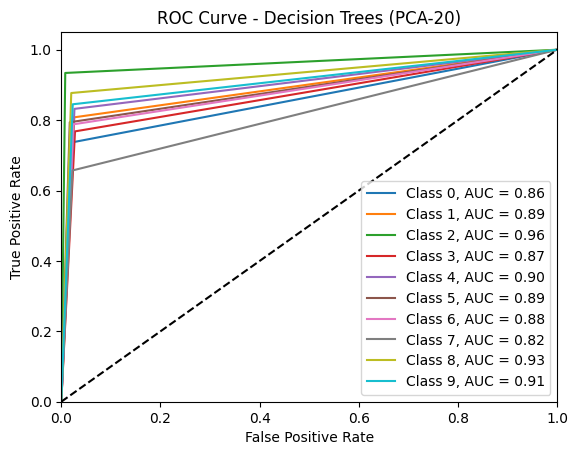

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1000
           1       0.83      0.93      0.88      1000
           2       1.00      0.98      0.99      1000
           3       0.87      0.93      0.90      1000
           4       0.84      0.94      0.89      1000
           5       0.91      0.87      0.89      1000
           6       0.87      0.88      0.88      1000
           7       0.94      0.76      0.84      1000
           8       0.91      0.97      0.94      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

ROC-AUC (Macro): 0.9931976444444445



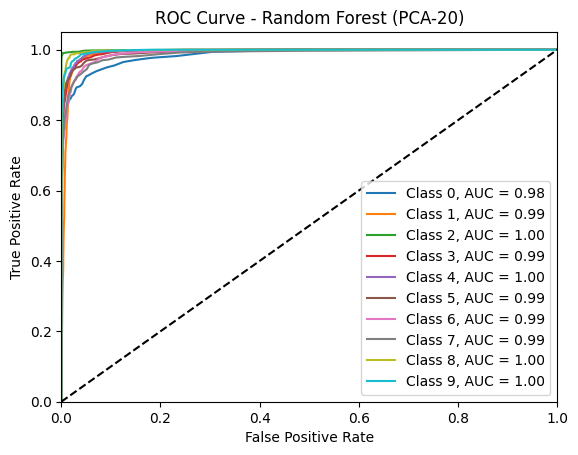

Naive Bayes
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      1000
           1       0.73      0.80      0.77      1000
           2       0.91      0.97      0.94      1000
           3       0.76      0.80      0.78      1000
           4       0.74      0.88      0.80      1000
           5       0.87      0.73      0.79      1000
           6       0.78      0.81      0.80      1000
           7       0.77      0.70      0.73      1000
           8       0.75      0.83      0.79      1000
           9       0.91      0.82      0.86      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

ROC-AUC (Macro): 0.9767439444444443



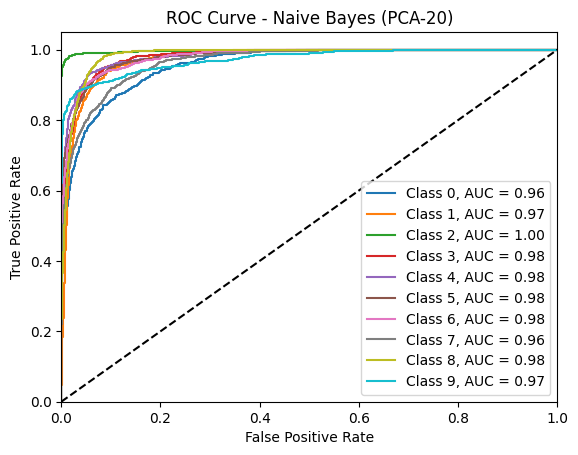

K-NN
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1000
           1       0.84      0.97      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.92      0.92      0.92      1000
           4       0.83      0.97      0.90      1000
           5       0.95      0.90      0.92      1000
           6       0.90      0.92      0.91      1000
           7       0.95      0.81      0.88      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000

ROC-AUC (Macro): 0.9812879555555556



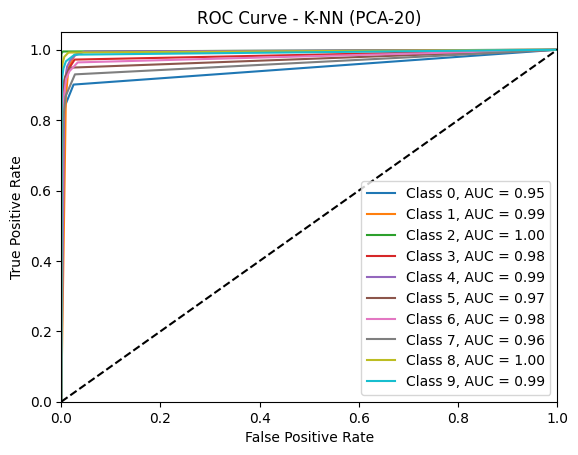

SVM
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1000
           1       0.87      0.96      0.92      1000
           2       1.00      0.99      0.99      1000
           3       0.92      0.93      0.93      1000
           4       0.87      0.97      0.92      1000
           5       0.95      0.91      0.93      1000
           6       0.91      0.94      0.92      1000
           7       0.97      0.82      0.89      1000
           8       0.95      0.98      0.97      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

ROC-AUC (Macro): 0.9968773333333333



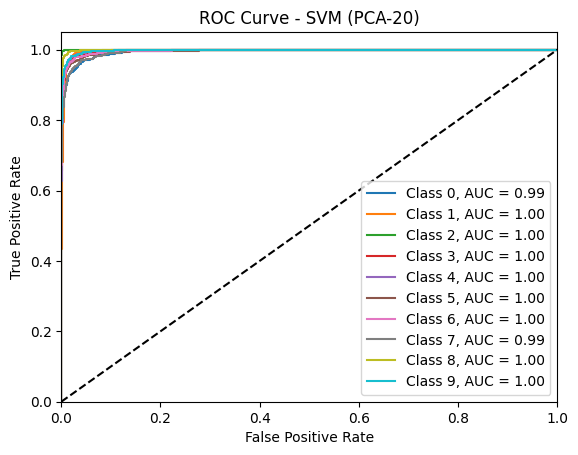

PCA Component Size: 25
Decision Trees
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1000
           1       0.77      0.81      0.79      1000
           2       0.94      0.93      0.94      1000
           3       0.77      0.76      0.77      1000
           4       0.80      0.84      0.82      1000
           5       0.80      0.82      0.81      1000
           6       0.79      0.80      0.79      1000
           7       0.75      0.67      0.71      1000
           8       0.81      0.88      0.84      1000
           9       0.82      0.81      0.82      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000

ROC-AUC (Macro): 0.8917777777777779



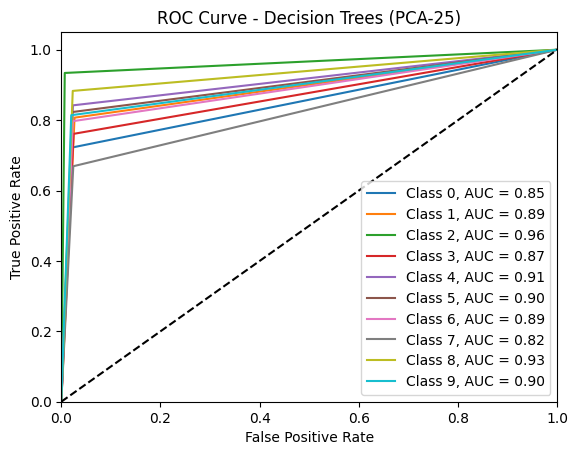

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1000
           1       0.84      0.94      0.88      1000
           2       0.99      0.98      0.99      1000
           3       0.87      0.93      0.90      1000
           4       0.84      0.94      0.89      1000
           5       0.93      0.88      0.90      1000
           6       0.89      0.89      0.89      1000
           7       0.94      0.79      0.86      1000
           8       0.91      0.98      0.94      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000

ROC-AUC (Macro): 0.9936109055555555



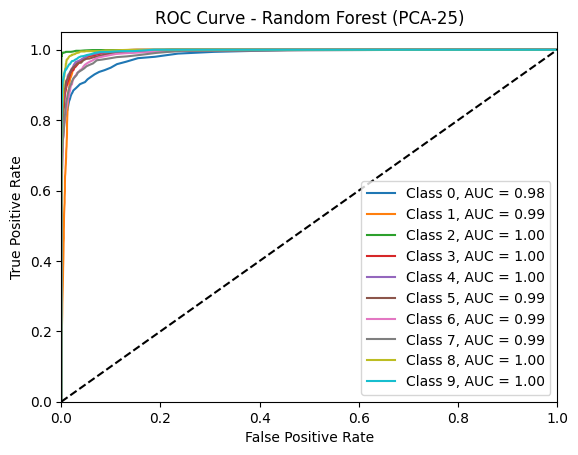

Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.63      0.71      1000
           1       0.74      0.82      0.78      1000
           2       0.91      0.98      0.94      1000
           3       0.78      0.81      0.79      1000
           4       0.75      0.88      0.81      1000
           5       0.87      0.76      0.81      1000
           6       0.79      0.81      0.80      1000
           7       0.76      0.70      0.73      1000
           8       0.77      0.84      0.80      1000
           9       0.93      0.83      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

ROC-AUC (Macro): 0.9780942222222221



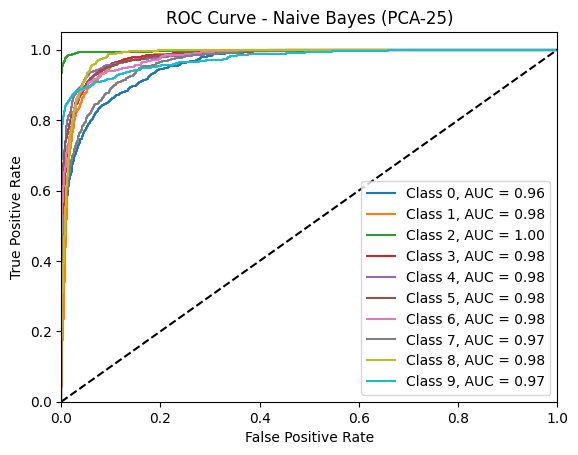

K-NN
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1000
           1       0.84      0.98      0.90      1000
           2       1.00      0.99      0.99      1000
           3       0.93      0.93      0.93      1000
           4       0.84      0.98      0.91      1000
           5       0.95      0.91      0.93      1000
           6       0.91      0.92      0.91      1000
           7       0.96      0.82      0.88      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

ROC-AUC (Macro): 0.9815940944444443



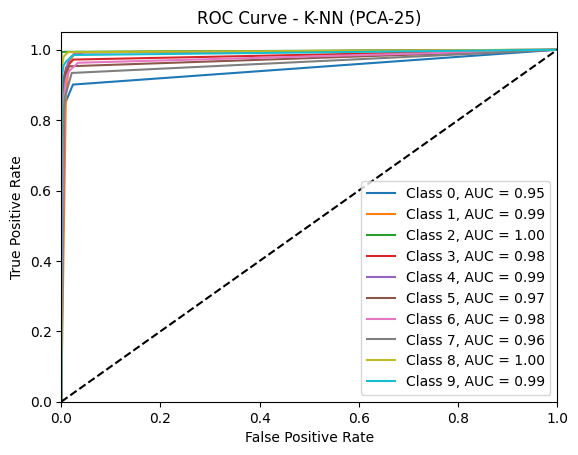

SVM
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1000
           1       0.88      0.96      0.92      1000
           2       1.00      0.99      0.99      1000
           3       0.93      0.94      0.93      1000
           4       0.88      0.97      0.92      1000
           5       0.96      0.92      0.94      1000
           6       0.93      0.94      0.93      1000
           7       0.97      0.84      0.90      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

ROC-AUC (Macro): 0.9971166888888889



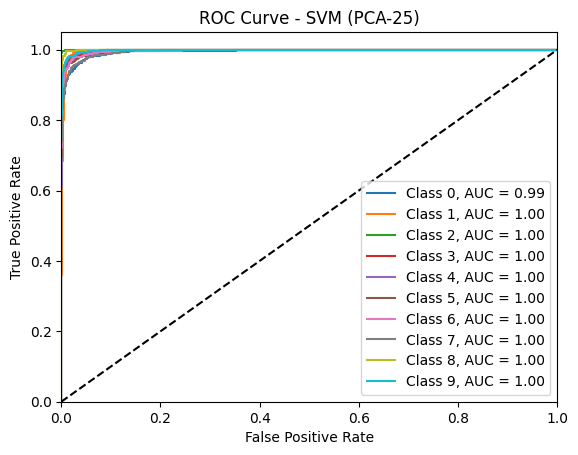

PCA Component Size: 30
Decision Trees
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1000
           1       0.76      0.81      0.78      1000
           2       0.92      0.93      0.93      1000
           3       0.78      0.79      0.78      1000
           4       0.78      0.84      0.81      1000
           5       0.82      0.80      0.81      1000
           6       0.80      0.80      0.80      1000
           7       0.76      0.67      0.71      1000
           8       0.82      0.88      0.85      1000
           9       0.82      0.83      0.82      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

ROC-AUC (Macro): 0.8923333333333332



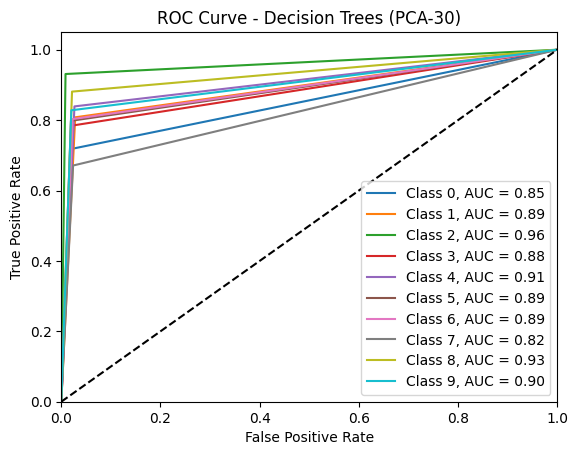

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1000
           1       0.84      0.94      0.88      1000
           2       0.99      0.98      0.99      1000
           3       0.89      0.93      0.91      1000
           4       0.85      0.94      0.89      1000
           5       0.93      0.88      0.90      1000
           6       0.88      0.90      0.89      1000
           7       0.95      0.77      0.85      1000
           8       0.90      0.97      0.93      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

ROC-AUC (Macro): 0.9933704333333333



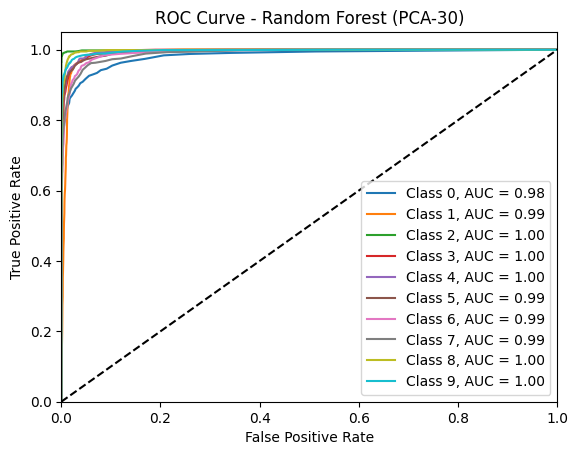

Naive Bayes
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.74      0.84      0.79      1000
           2       0.91      0.98      0.94      1000
           3       0.80      0.82      0.81      1000
           4       0.76      0.88      0.81      1000
           5       0.88      0.77      0.82      1000
           6       0.79      0.81      0.80      1000
           7       0.77      0.70      0.73      1000
           8       0.78      0.84      0.81      1000
           9       0.93      0.84      0.88      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000

ROC-AUC (Macro): 0.9788965777777776



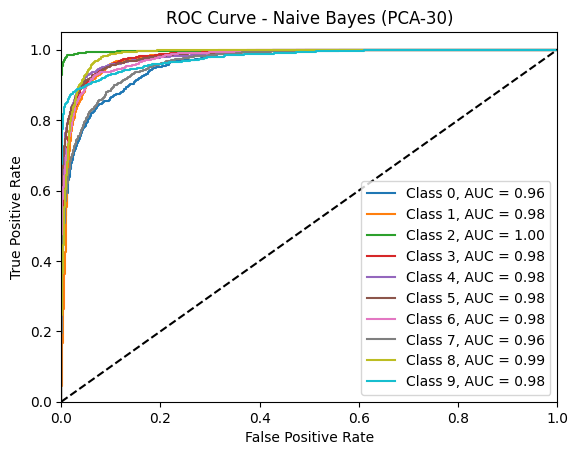

K-NN
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1000
           1       0.84      0.98      0.91      1000
           2       1.00      0.99      0.99      1000
           3       0.94      0.94      0.94      1000
           4       0.86      0.98      0.92      1000
           5       0.96      0.91      0.93      1000
           6       0.91      0.93      0.92      1000
           7       0.96      0.82      0.88      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

ROC-AUC (Macro): 0.9820748888888889



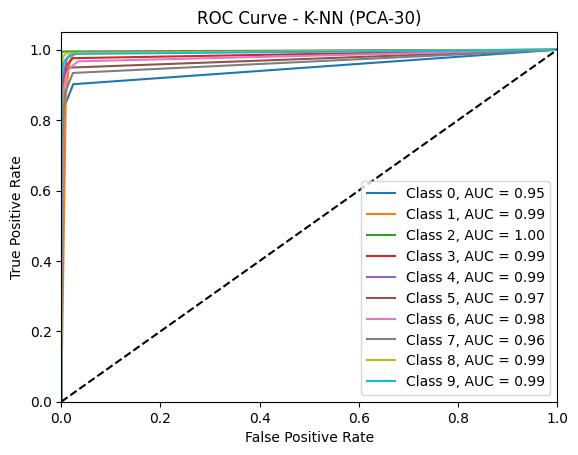

SVM
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      1000
           1       0.88      0.97      0.92      1000
           2       1.00      0.99      0.99      1000
           3       0.94      0.94      0.94      1000
           4       0.88      0.97      0.92      1000
           5       0.96      0.92      0.94      1000
           6       0.92      0.94      0.93      1000
           7       0.97      0.84      0.90      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.97      0.96      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

ROC-AUC (Macro): 0.9974370333333333



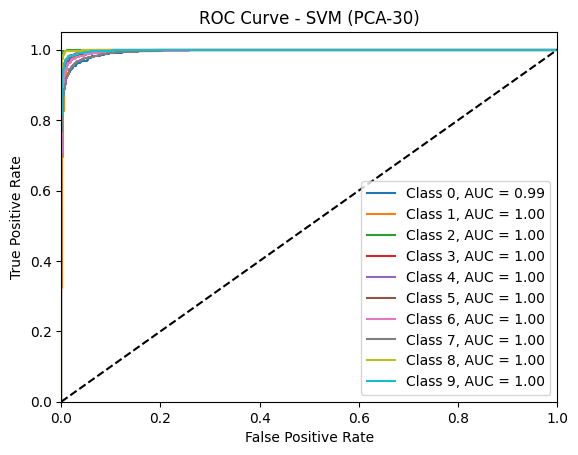

In [54]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Load the dataset from the npz file
# (Assuming the dataset has already been loaded as X_train, X_test, y_train, y_test)

# Reshape X_train and X_test to 2D arrays
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Reshape y_train and y_test to 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

classifiers = {
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

component_sizes = [15, 20, 25, 30]

for size in component_sizes:
    pca = PCA(n_components=size)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    print(f"PCA Component Size: {size}")
    for name, classifier in classifiers.items():
        classifier.fit(X_train_pca, y_train)
        y_pred = classifier.predict(X_test_pca)
        y_prob = classifier.predict_proba(X_test_pca)
        
        # For each class, calculate the ROC curve and AUC separately
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(np.unique(y_test))):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        # Macro-average ROC-AUC (calculate the mean AUC across all classes)
        macro_roc_auc = np.mean(list(roc_auc.values()))
        
        print(name)
        print(classification_report(y_test, y_pred))
        print("ROC-AUC (Macro):", macro_roc_auc)
        print()

        # Plot ROC curves for each class
        plt.figure()
        for i in range(len(np.unique(y_test))):
            plt.plot(fpr[i], tpr[i], label=f'Class {i}, AUC = {roc_auc[i]:.2f}')

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name} (PCA-{size})')
        plt.legend(loc="lower right")
        plt.show()



In [ ]:
# project 2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Load the dataset into a pandas DataFrame
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\FinalBalancedDataset.csv\FinalBalancedDataset.csv")

# Step 2: Prepare the data for modeling
X = data["tweet"]
y = data["Toxicity"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the text data using Bag of Words and TF-IDF
vectorizer_bow = CountVectorizer(max_features=10000)  # Limit the number of features for faster training
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

vectorizer_tfidf = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Step 4: Define the classifiers and fit the models
classifiers = {
    "Decision Trees": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(max_depth=10, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

results = {}

for name, classifier in classifiers.items():
    print(f"Fitting {name}...")
    classifier.fit(X_train_bow, y_train)
    y_pred_bow = classifier.predict(X_test_bow)
    y_prob_bow = classifier.predict_proba(X_test_bow)[:, 1]

    classifier.fit(X_train_tfidf, y_train)
    y_pred_tfidf = classifier.predict(X_test_tfidf)
    y_prob_tfidf = classifier.predict_proba(X_test_tfidf)[:, 1]

    # Step 5: Calculate the metrics for Bag of Words
    results[name + " (Bag of Words)"] = {
        "Classification Report": classification_report(y_test, y_pred_bow),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_bow),
        "ROC-AUC": roc_auc_score(y_test, y_prob_bow)
    }

    # Step 6: Calculate the metrics for TF-IDF
    results[name + " (TF-IDF)"] = {
        "Classification Report": classification_report(y_test, y_pred_tfidf),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_tfidf),
        "ROC-AUC": roc_auc_score(y_test, y_prob_tfidf)
    }

# Step 7: Display the results
for name, metrics in results.items():
    print(name)
    print("Classification Report:")
    print(metrics["Classification Report"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("ROC-AUC:", metrics["ROC-AUC"])
    print("\n")
    plt.show()


Fitting Decision Trees...
Fitting Random Forest...
Fitting Naive Bayes...
Fitting K-NN...
Fitting SVM...
Decision Trees (Bag of Words)
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      6472
           1       0.96      0.77      0.85      4877

    accuracy                           0.88     11349
   macro avg       0.90      0.87      0.88     11349
weighted avg       0.89      0.88      0.88     11349

Confusion Matrix:
[[6297  175]
 [1146 3731]]
ROC-AUC: 0.878018048061421




NameError: name 'plt' is not defined